In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [36]:
# Next, we’ll take advantage of the make_classification function from the scikit-learn library to generate data. As we mentioned previously, 
#Logistic Regression is only applicable to binary classification problems. 
#Thus, the data points are composed of two classes.

In [21]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

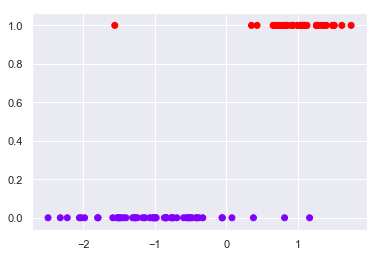

In [22]:
# We plot the relationship between the feature and classes.
plt.scatter(x, y, c=y, cmap='rainbow')

In [23]:
#Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [24]:
# We instantiate an instance of the LogisticRegression class and call the fit function with the features and the labels (since Logistic Regression is a
#supervised machine learning algorithm) as arguments.

lr = LogisticRegression()
lr.fit(x_train, y_train)

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
#We can access the following properties to actually view the coefficient for the slope and y-intercept of the best fitting line.
print(lr.coef_)
print(lr.intercept_)

[[2.33640228]]
[-0.51908272]


In [44]:
# Let’s see how the model performs against data that it hasn’t been trained on.

In [29]:
y_pred = lr.predict(x_test)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1])

In [30]:
# Given that this consists of a classification problem, 
#we use a confusion matrix to measure the accuracy of our model.

confusion_matrix(y_test, y_pred)

array([[ 9,  0],
       [ 0, 16]])

In [31]:
# If for whatever reason we’d like to check the actual probability that a data 
#point belongs to a given class, 
#we can use the predict_proba function.

lr.predict_proba(x_test)

array([[0.16120001, 0.83879999],
       [0.24453426, 0.75546574],
       [0.1156377 , 0.8843623 ],
       [0.97806877, 0.02193123],
       [0.19159942, 0.80840058],
       [0.08122524, 0.91877476],
       [0.8182128 , 0.1817872 ],
       [0.22698092, 0.77301908],
       [0.13022491, 0.86977509],
       [0.8572159 , 0.1427841 ],
       [0.87119647, 0.12880353],
       [0.05999036, 0.94000964],
       [0.98151577, 0.01848423],
       [0.98561595, 0.01438405],
       [0.9973817 , 0.0026183 ],
       [0.99671509, 0.00328491],
       [0.13939423, 0.86060577],
       [0.25915459, 0.74084541],
       [0.07733889, 0.92266111],
       [0.42482565, 0.57517435],
       [0.25863814, 0.74136186],
       [0.04724451, 0.95275549],
       [0.94513199, 0.05486801],
       [0.2205368 , 0.7794632 ],
       [0.06630004, 0.93369996]])

In [49]:
# The first column corresponds to the 
#probability that the sample belongs to the first class and the
#second column corresponds to the probability that the 
#sample belongs to the second class.
#Before attempting to plot the Sigmoid function, we create and sort a DataFrame containing our test data.

In [33]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
print(df)

           x  y
14 -2.321314  0
15 -2.223950  0
13 -1.587083  0
12 -1.477955  0
3  -1.403262  0
22 -0.996109  0
10 -0.596000  0
9  -0.544972  0
6  -0.421675  0
19  0.351856  1
17  0.671738  1
20  0.672890  1
1   0.704956  1
7   0.746670  1
23  0.762550  1
4   0.838355  1
0   0.928097  1
16  1.001289  1
8   1.034948  1
2   1.092914  1
5   1.260441  1
18  1.283233  1
24  1.354239  1
11  1.399925  1
21  1.507919  1


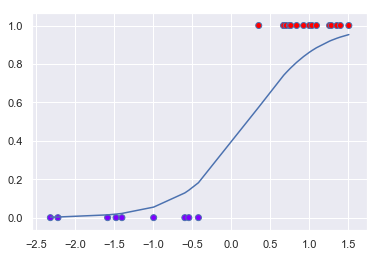

In [32]:
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

In [52]:
![title]('pic.png')

/bin/sh: -c: line 0: syntax error near unexpected token `'pic.png''
/bin/sh: -c: line 0: `[title]('pic.png')'
